Loaded dataset shape: (4269, 13)
Columns: ['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected



Missing values per column:
loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64
Target column not found in common names; using last column:  loan_status

Detected target column:  loan_status

Target value counts:
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


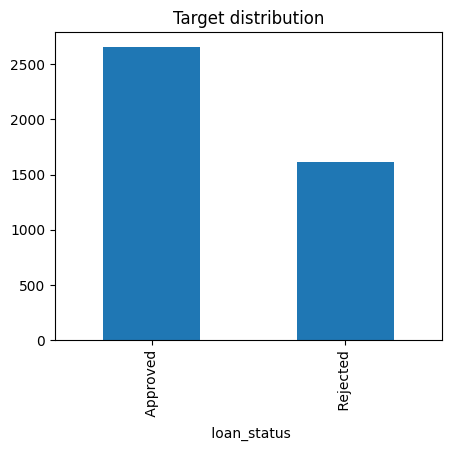


Numeric columns: ['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']
Categorical columns: [' education', ' self_employed']


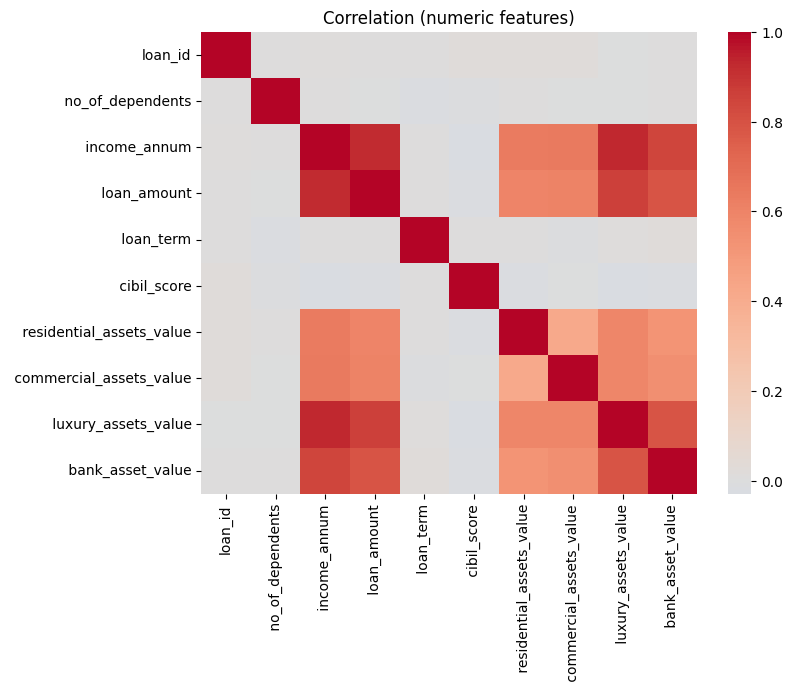


After mapping, target distribution:
 loan_status
0    2656
1    1613
Name: count, dtype: int64
Train size: (3415, 12) Test size: (854, 12)
Preprocessed feature matrix shapes: (3415, 14) (854, 14)
SMOTE not applied.
--- Training LogisticRegression ---
LogisticRegression trained.
--- Training DecisionTree ---
DecisionTree trained.

Model: LogisticRegression
Classification report:
              precision    recall  f1-score   support

           0     0.9249    0.9510    0.9378       531
           1     0.9156    0.8731    0.8938       323

    accuracy                         0.9215       854
   macro avg     0.9202    0.9121    0.9158       854
weighted avg     0.9214    0.9215    0.9212       854

Macro Precision: 0.9202, Macro Recall: 0.9121, Macro F1: 0.9158


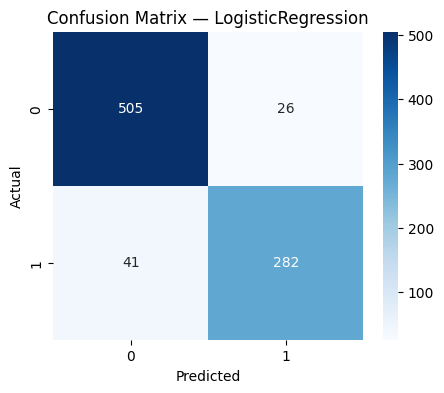


Model: DecisionTree
Classification report:
              precision    recall  f1-score   support

           0     0.9704    0.9887    0.9795       531
           1     0.9808    0.9505    0.9654       323

    accuracy                         0.9742       854
   macro avg     0.9756    0.9696    0.9724       854
weighted avg     0.9744    0.9742    0.9742       854

Macro Precision: 0.9756, Macro Recall: 0.9696, Macro F1: 0.9724


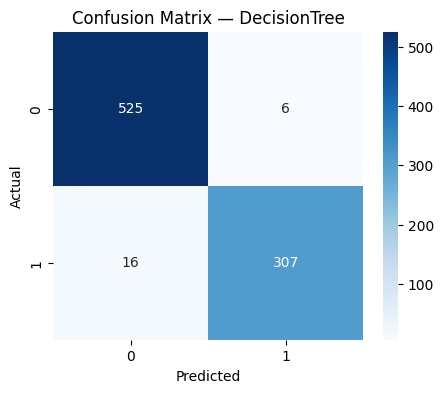

Do you want to save any of the trained models to Google Drive? (y/n): n
No model saved.
Sample input (raw):
      loan_id   no_of_dependents  education  self_employed   income_annum  \
2346     2347                  3   Graduate             No        8000000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
2346      26200000          16           890                   15800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  
2346                   4300000              25000000            4000000  

Predictions on sample:
LogisticRegression prediction: 0
DecisionTree prediction: 0


In [1]:
# Task 4 — Loan Approval Prediction (Google Colab ready)
# -----------------------------------------------------
# Clean Colab notebook script. Paste cells into Colab or upload as .py.
# Features:
# - Loads `loan_approval_dataset.csv` (upload to Colab Files or put in Drive)
# - Light EDA (target distribution, feature types, correlation heatmap)
# - Preprocessing: missing value handling, categorical encoding (OneHot), scaling
# - Optional SMOTE toggle to handle class imbalance
# - Train & compare Logistic Regression and Decision Tree (no hyperparameter tuning)
# - Evaluation: precision, recall, F1 (per-class and macro), confusion matrices
# - Option to save chosen model(s) to Google Drive
# - Interactive prediction example

# %%
# Install required packages (Colab usually has most; imbalanced-learn might not be installed)
!pip install -q scikit-learn pandas matplotlib seaborn imbalanced-learn joblib

# %% [markdown]
# ## 1) Setup & Load Data
# Place `loan_approval_dataset.csv` into Colab Files panel or in your Drive (MyDrive/) and update path accordingly.

# %%
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import joblib

DATA_FILENAME = 'loan_approval_dataset.csv'

# Try session first, then Drive
if os.path.exists(DATA_FILENAME):
    df = pd.read_csv(DATA_FILENAME)
else:
    drive_path = '/content/drive/MyDrive/' + DATA_FILENAME
    if os.path.exists(drive_path):
        df = pd.read_csv(drive_path)
    else:
        raise FileNotFoundError(
            f"{DATA_FILENAME} not found in session or Drive.\nUpload the CSV to Colab Files panel or place it in Drive and re-run.")

print('Loaded dataset shape:', df.shape)
print('Columns:', list(df.columns))

# %% [markdown]
# ## 2) Quick EDA

# %%
# Display top rows and missing value counts
display(df.head())
print('\nMissing values per column:')
print(df.isnull().sum())

# Identify target column heuristically (common names: Loan_Status, Approved, Target, loan_status)
possible_targets = ['Loan_Status','loan_status','LoanStatus','Approved','approved','Target','target']
target_col = None
for t in possible_targets:
    if t in df.columns:
        target_col = t
        break
if target_col is None:
    # fallback: if dataset has a column named 'Status' or last column could be target
    if 'Status' in df.columns:
        target_col = 'Status'
    else:
        target_col = df.columns[-1]
        print(f"Target column not found in common names; using last column: {target_col}")

print('\nDetected target column:', target_col)
print('\nTarget value counts:')
print(df[target_col].value_counts())

# Visualize target distribution
plt.figure(figsize=(5,4))
df[target_col].value_counts().plot(kind='bar')
plt.title('Target distribution')
plt.show()

# Quick feature type summary
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
# Remove target from lists if present
if target_col in numeric_cols:
    numeric_cols.remove(target_col)
if target_col in cat_cols:
    cat_cols.remove(target_col)

print('\nNumeric columns:', numeric_cols)
print('Categorical columns:', cat_cols)

# Correlation heatmap for numeric features (show a subset if too many)
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, cmap='coolwarm', center=0)
    plt.title('Correlation (numeric features)')
    plt.show()

# %% [markdown]
# ## 3) Preprocessing
# Strategy:
# - Numeric: impute median
# - Categorical: impute mode and OneHotEncode (handle_unknown='ignore')
# - Scale numeric features for Logistic Regression

# %%
# Define feature lists again to be safe
numeric_features = [c for c in numeric_cols if c != target_col]
categorical_features = [c for c in cat_cols if c != target_col]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# Prepare X and y
X = df.drop(columns=[target_col])
y = df[target_col]

# If target is strings like 'Y'/'N' or 'Yes'/'No', convert to 0/1
if y.dtype == 'object' or y.dtype.name == 'category':
    # Create mapping
    unique_vals = sorted(y.unique())
    if set([str(x).lower() for x in unique_vals]) <= set(['y','n','yes','no','approved','rejected','1','0']):
        # map common variants
        mapping = {}
        for val in unique_vals:
            sval = str(val).lower()
            if sval in ['y','yes','approved','1']:
                mapping[val] = 1
            else:
                mapping[val] = 0
        y = y.map(mapping)
    else:
        # fallback: map first unique to 0, second to 1 if binary
        uniq = list(unique_vals)
        if len(uniq) == 2:
            y = y.map({uniq[0]:0, uniq[1]:1})

# If still not numeric, force conversion
y = pd.to_numeric(y, errors='coerce')
if y.isnull().any():
    raise ValueError('Target column contains non-convertible values after mapping. Inspect the target column.')

print('\nAfter mapping, target distribution:')
print(pd.Series(y).value_counts())

# %% [markdown]
# ## 4) Train/Test Split

# %%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print('Train size:', X_train.shape, 'Test size:', X_test.shape)

# %% [markdown]
# ## 5) Optional: SMOTE (toggle)
# Set USE_SMOTE = True to apply SMOTE oversampling on the training set.

# %%
USE_SMOTE = False  # <-- change to True to enable SMOTE

# Fit + transform preprocessing for training data
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

print('Preprocessed feature matrix shapes:', X_train_prep.shape, X_test_prep.shape)

if USE_SMOTE:
    print('Applying SMOTE on training data...')
    sm = SMOTE(random_state=42)
    X_train_prep, y_train = sm.fit_resample(X_train_prep, y_train)
    print('After SMOTE, train distribution:', np.bincount(y_train))
else:
    print('SMOTE not applied.')

# %% [markdown]
# ## 6) Train Models
# We train Logistic Regression and Decision Tree with default parameters.

# %%
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

fitted_models = {}
for name, mdl in models.items():
    print(f'--- Training {name} ---')
    mdl.fit(X_train_prep, y_train)
    fitted_models[name] = mdl
    print(f'{name} trained.')

# %% [markdown]
# ## 7) Evaluation
# For each model, we show precision, recall, f1 (per-class and macro) and confusion matrix.

# %%
for name, mdl in fitted_models.items():
    print(f"\nModel: {name}")
    y_pred = mdl.predict(X_test_prep)
    print('Classification report:')
    print(classification_report(y_test, y_pred, digits=4))
    prec_macro = precision_score(y_test, y_pred, average='macro')
    rec_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    print(f"Macro Precision: {prec_macro:.4f}, Macro Recall: {rec_macro:.4f}, Macro F1: {f1_macro:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix — {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# %% [markdown]
# ## 8) Save a model to Google Drive (optional)
# If you mounted Drive earlier and want to save, set SAVE_TO_DRIVE = True and adjust the path.
# Alternatively, interactively choose here.

# %%
SAVE_OPTION = input('Do you want to save any of the trained models to Google Drive? (y/n): ').strip().lower()
if SAVE_OPTION == 'y':
    # Ask which model to save
    print('Available models:', list(fitted_models.keys()))
    choice = input('Enter model name to save (exact): ').strip()
    if choice in fitted_models:
        save_path = input('Enter Drive path to save model (e.g., /content/drive/MyDrive/loan_models/): ').strip()
        if save_path == '':
            save_path = '/content/drive/MyDrive/loan_models/'
        os.makedirs(save_path, exist_ok=True)
        filename = os.path.join(save_path, choice + '_model.joblib')
        joblib.dump(fitted_models[choice], filename)
        print('Model saved to', filename)
    else:
        print('Model name not found. No model saved.')
else:
    print('No model saved.')

# %% [markdown]
# ## 9) Interactive prediction example
# Provide a single-row input as a dict with feature names (use original column names).

# %%
# Example: prepare a sample from test set for quick interactive prediction
sample_row = X_test.iloc[0:1].copy()
print('Sample input (raw):')
print(sample_row)

# Preprocess sample
sample_prep = preprocessor.transform(sample_row)
print('\nPredictions on sample:')
for name, mdl in fitted_models.items():
    pred = mdl.predict(sample_prep)[0]
    print(f"{name} prediction: {pred}")

# %% [markdown]
# ## End

